## Second method of Feature Scaling is Normalization and MinMaxScaler is method of Normalization

`Standardization vs Normalization`

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("Datasets\wine dataset.csv",usecols=["class","Alcohol","Malic acid"])
df.head(4)

,class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95


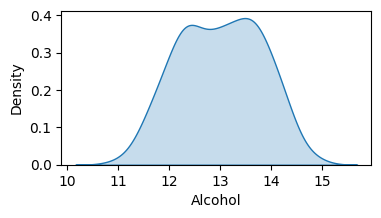

In [48]:
plt.figure(figsize=(4,2))
sns.kdeplot(df["Alcohol"],fill=True)
plt.show()

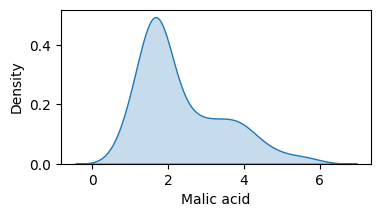

In [49]:
plt.figure(figsize=(4,2))
sns.kdeplot(df["Malic acid"],fill=True)
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

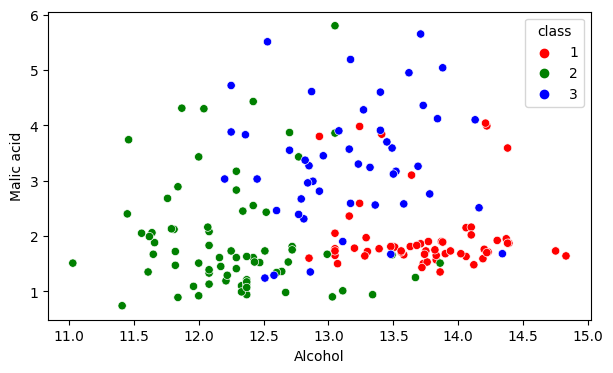

In [50]:
plt.figure(figsize=(7,4))
color_dic = {1:"red",2:"green",3:"blue"}
sns.scatterplot(x=df["Alcohol"], y=df["Malic acid"], hue=df["class"], palette=color_dic)

In [51]:
x = df.drop("class",axis=1)
y = df["class"]

In [52]:
x.head(3)

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36


In [53]:
y.head(3)

0    1
1    1
2    1
Name: class, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.shape , x_test.shape

((124, 2), (54, 2))

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [56]:
x_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

## scaled x_train,x_test are in numpy array, so convert it into dataframe

In [57]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [58]:
x_test_scaled_df.head(3)

,Alcohol,Malic acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420


In [59]:
round(x_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [60]:
round(x_train_scaled_df.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

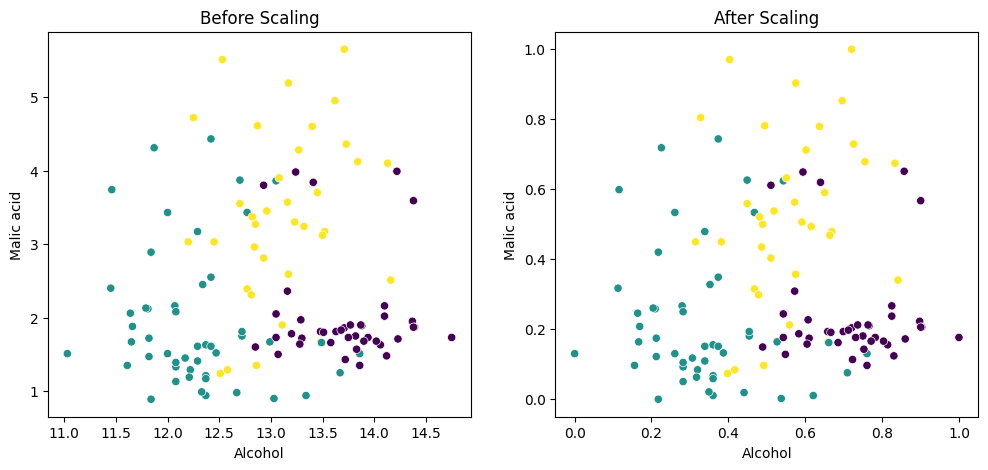

In [61]:
figure, (axes1, axes2) = plt.subplots(ncols=2, figsize=(12,5))

sns.scatterplot(x="Alcohol", y="Malic acid", data=x_train, ax=axes1, c=y_train)
axes1.set_title("Before Scaling")

sns.scatterplot(x="Alcohol", y="Malic acid", data=x_train_scaled_df, ax=axes2, c=y_train)
axes2.set_title("After Scaling")

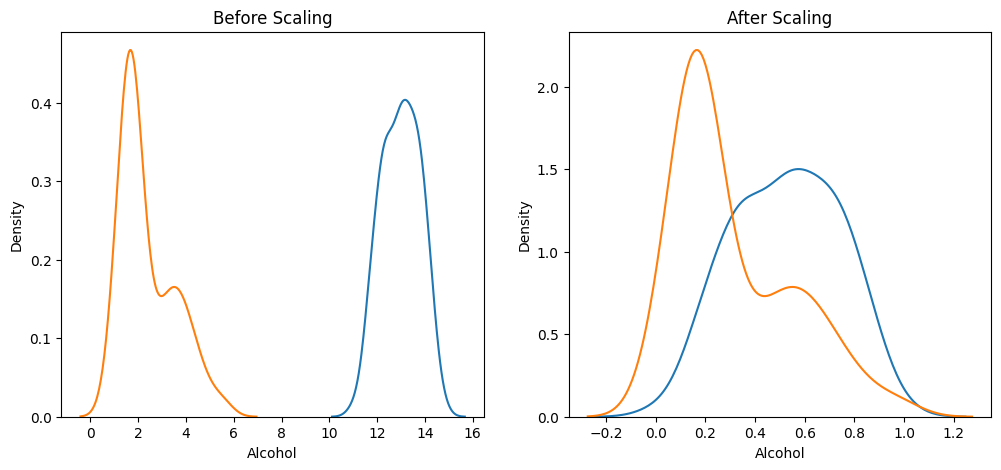

In [62]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Alcohol"], ax=ax1)
sns.kdeplot(x_train["Malic acid"], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled_df["Alcohol"], ax=ax2)
sns.kdeplot(x_train_scaled_df["Malic acid"], ax=ax2)
plt.show()

<Axes: title={'center': 'Alcohol Distribution After Scaling'}, xlabel='Alcohol', ylabel='Density'>

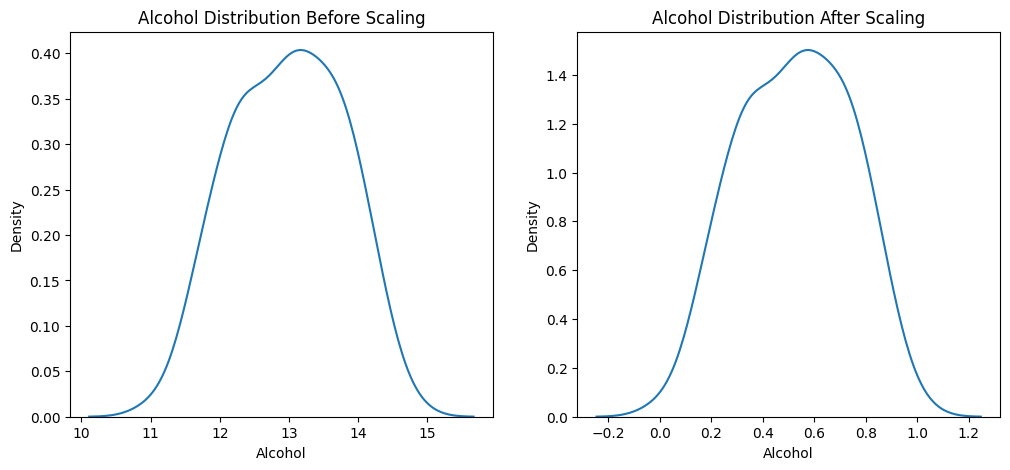

In [63]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(x_train["Alcohol"], ax=ax1)

ax2.set_title("Alcohol Distribution After Scaling")
sns.kdeplot(x_train_scaled_df["Alcohol"], ax=ax2)

<Axes: title={'center': 'Malic Distribution After Scaling'}, xlabel='Malic acid', ylabel='Density'>

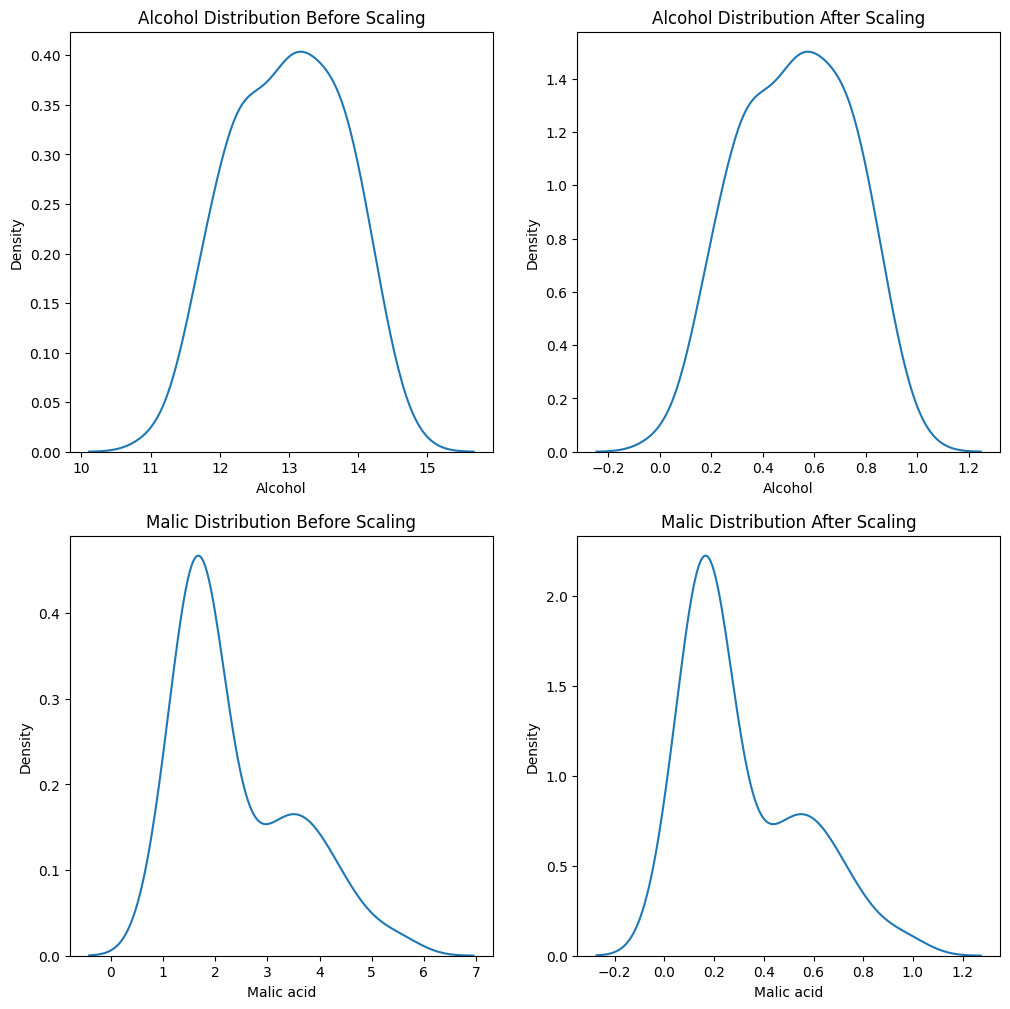

In [67]:
fig, axes = plt.subplots(nrows=2 ,ncols=2, figsize=(12,12))

axes[0,0].set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(x_train["Alcohol"], ax=axes[0,0])

axes[0,1].set_title("Alcohol Distribution After Scaling")
sns.kdeplot(x_train_scaled_df["Alcohol"], ax=axes[0,1])

axes[1,0].set_title("Malic Distribution Before Scaling")
sns.kdeplot(x_train["Malic acid"], ax=axes[1,0])

axes[1,1].set_title("Malic Distribution After Scaling")
sns.kdeplot(x_train_scaled_df["Malic acid"], ax=axes[1,1])

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled_df, y_train)

LogisticRegression()

In [72]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled_df)

In [74]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))
print(accuracy_score(y_pred_scaled, y_test))

0.7592592592592593
0.7962962962962963


## MinMaxSclaler improve the accuracy of model